In [52]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

In [61]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape

(60000, 28, 28)

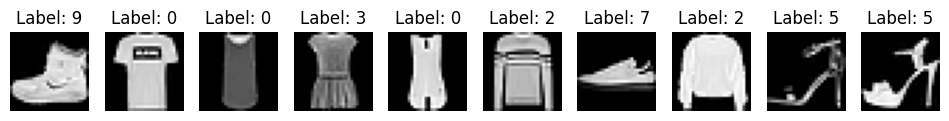

In [62]:
num_samples = 10
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [63]:
train_data[0].shape

(28, 28)

In [64]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])


In [65]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 3, 3, 64)        

In [66]:
train_images = train_data.reshape((60000, 28, 28, 1))
train_images = train_data.astype("float32") / 255
test_images = test_data.reshape((10000, 28, 28, 1))
test_images = test_data.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.5116 - accuracy: 0.8116
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.8895
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2529 - accuracy: 0.9064
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2207 - accuracy: 0.9188
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1987 - accuracy: 0.9278
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1794 - accuracy: 0.9331
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1632 - accuracy: 0.9396
Epoch 8/15
938/938 [==============================] - 2s 3ms/step - loss: 0.1484 - accuracy: 0.9462
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1361 - accuracy: 0.9487
Epoch 10/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1239 - accuracy: 0.9548

In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.9176
0.9175999760627747


### Точність моделі зросла з 88% до 92%